In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.inspection import partial_dependence, plot_partial_dependence
pd.set_option('display.max_columns', 100)
plt.rc('font', family='Malgun Gothic') 

In [2]:
suwon_df = pd.read_csv(r"C:\Users\tjoeun707-12\Desktop\그룹프로젝트\suwon_high_df.csv",encoding='cp949')
del suwon_df["Unnamed: 0"]

In [3]:
cols = [col for col in suwon_df.columns if col != "사고내용"]

In [4]:
le = LabelEncoder()

In [5]:
cols_cat = [col for col in cols if col not in ["가해운전자.연령","피해운전자.연령"]]

for col in cols_cat:
    suwon_df[col] = le.fit_transform(suwon_df[col])

In [6]:
X = suwon_df[cols]
y = suwon_df["사고내용"]

In [7]:
# X = pd.get_dummies(data = X,columns= cols)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [8]:
evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimatrs=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds=200,eval_set=evals, eval_metric="logloss")
y_pred = xgb_wrapper.predict(X_test)
print("xgboost 정확도: %.3f"%accuracy_score(y_test,y_pred))

[15:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimatrs" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.67331
[1]	validation_0-logloss:0.65717
[2]	validation_0-logloss:0.64386
[3]	validation_0-logloss:0.63282
[4]	validation_0-logloss:0.62372
[5]	validation_0-logloss:0.61595
[6]	validation_0-logloss:0.60951
[7]	validation_0-logloss:0.60441
[8]	validation_0-logloss:0.59973
[9]	validation_0-logloss:0.59473
[10]	validation_0-logloss:0.59202
[11]	validation_0-logloss:0.58877
[12]	validation_0-logloss:0.58633
[13]	validation_0-logloss:0.58454
[14]	validation_0-logloss:0.58200
[15]	validation_0-logloss:0.58107
[16]	validation_0-logloss:0.58065
[17]	validation_0-logloss:0.57972
[18]	va

C:\Users\tjoeun707-12\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.57259
[42]	validation_0-logloss:0.57259
[43]	validation_0-logloss:0.57214
[44]	validation_0-logloss:0.57205
[45]	validation_0-logloss:0.57172
[46]	validation_0-logloss:0.57177
[47]	validation_0-logloss:0.57217
[48]	validation_0-logloss:0.57207
[49]	validation_0-logloss:0.57206
[50]	validation_0-logloss:0.57173
[51]	validation_0-logloss:0.57179
[52]	validation_0-logloss:0.57173
[53]	validation_0-logloss:0.57169
[54]	validation_0-logloss:0.57188
[55]	validation_0-logloss:0.57168
[56]	validation_0-logloss:0.57176
[57]	validation_0-logloss:0.57175
[58]	validation_0-logloss:0.57185
[59]	validation_0-logloss:0.57184
[60]	validation_0-logloss:0.57185
[61]	validation_0-logloss:0.57182
[62]	validation_0-logloss:0.57184
[63]	validation_0-logloss:0.57212
[64]	validation_0-logloss:0.57204
[65]	validation_0-logloss:0.57215
[66]	validation_0-logloss:0.57220
[67]	validation_0-logloss:0.57200
[68]	validation_0-logloss:0.57198
[69]	validation_0-logloss:0.57202
[70]	validatio

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

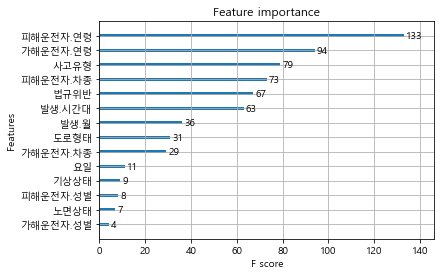

In [9]:
plot_importance(xgb_wrapper)

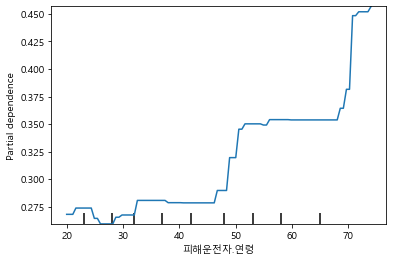

In [22]:
plot_partial_dependence(xgb_wrapper, X_test, ['피해운전자.연령'])

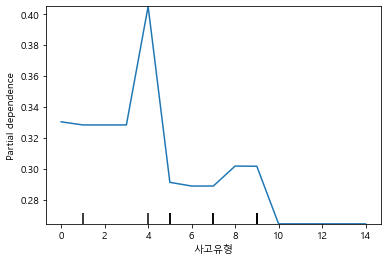

In [13]:
plot_partial_dependence(xgb_wrapper, X_test, ['사고유형']) ## 차대차 - 추돌일 때 가장 최대

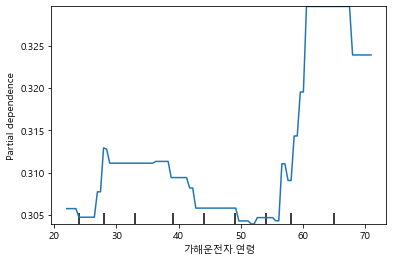

In [21]:
plot_partial_dependence(xgb_wrapper, X_test, ['가해운전자.연령']) 